In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('data/Images/'+train['Id'][i]+'.jpg',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:16<00:00, 432.29it/s]


In [5]:
X.shape

(7254, 128, 128, 3)

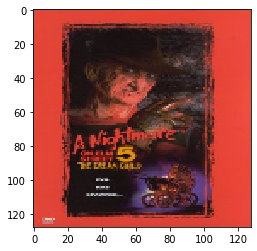

In [6]:
plt.imshow(X[1000])

In [7]:
train['Genre'][1000]

"['Horror', 'Thriller']"

In [8]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        5

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=32)

Train on 5803 samples, validate on 1451 samples
Epoch 1/60
5803/5803 [==============================] - 33s 6ms/sample - loss: 0.3480 - acc: 0.8639 - val_loss: 0.2630 - val_acc: 0.9062
Epoch 2/60
5803/5803 [==============================] - 35s 6ms/sample - loss: 0.2677 - acc: 0.9046 - val_loss: 0.2498 - val_acc: 0.9056
Epoch 3/60
5803/5803 [==============================] - 35s 6ms/sample - loss: 0.2594 - acc: 0.9055 - val_loss: 0.2479 - val_acc: 0.9062
Epoch 4/60
5803/5803 [==============================] - 35s 6ms/sample - loss: 0.2549 - acc: 0.9063 - val_loss: 0.2486 - val_acc: 0.9064
Epoch 5/60
5803/5803 [==============================] - 35s 6ms/sample - loss: 0.2525 - acc: 0.9069 - val_loss: 0.2418 - val_acc: 0.9062
Epoch 6/60
5803/5803 [==============================] - 35s 6ms/sample - loss: 0.2486 - acc: 0.9074 - val_loss: 0.2415 - val_acc: 0.9059
Epoch 7/60
5803/5803 [==============================] - 34s 6ms/sample - loss: 0.2466 - acc: 0.9082 - val_loss: 0.2386 - val_acc: 

5803/5803 [==============================] - 34s 6ms/sample - loss: 0.2102 - acc: 0.9222 - val_loss: 0.2404 - val_acc: 0.9108


In [14]:
#save your model and weight (only submit best model)
model.save('basemodels/model_E60.hdf5')

In [15]:
model_json = model.to_json()
with open("basemodels/model_E60.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('basemodels/model_60.h5')

In [16]:
val_eval = model.evaluate(X_test, y_test, verbose = 1)

1451/1451 [==============================] - 1s 1ms/sample - loss: 0.2404 - acc: 0.9108


In [17]:
print('Validation loss:', val_eval[0])
print('Validation accuracy:', val_eval[1])

Validation loss: 0.24042775483479753
Validation accuracy: 0.9107648


In [18]:
img = image.load_img('data/testing/roskywalker.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

Drama (0.531)
Action (0.248)
Comedy (0.196)


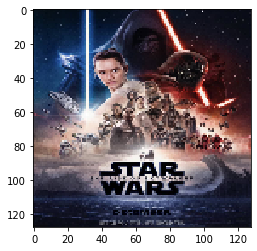

In [19]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [20]:
img = image.load_img('data/testing/inception.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

Drama (0.406)
Thriller (0.353)
Action (0.34)


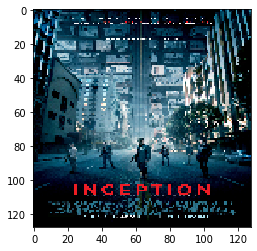

In [21]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [22]:
img = image.load_img('data/testing/parasite.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

Drama (0.572)
Thriller (0.235)
Action (0.229)


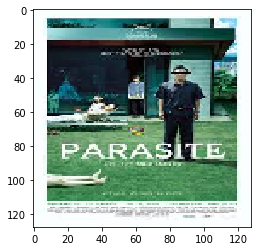

In [23]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [24]:
img = image.load_img('data/testing/cloy.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

Drama (0.411)
Comedy (0.3)
Action (0.296)


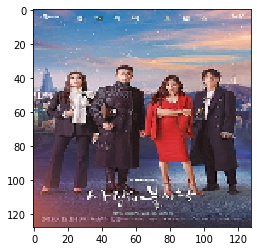

In [25]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [26]:
img = image.load_img('data/testing/IC.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

Drama (0.683)
Crime (0.274)
Comedy (0.274)


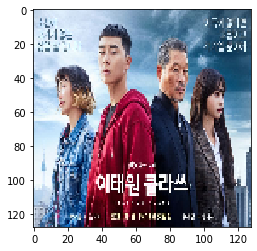

In [27]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)